# Stock Portfolio Forecasting and Optimization on S&P500


### Import Statements

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle
from fredapi import Fred
from sklearn.preprocessing import LabelEncoder

### Clustering

To perform the clustering analysis, we considered **volatility** and **volume** as the key variables. Volatility measures the degree of variation in a company's stock price over time, providing insights into its risk and market behavior. Volume, on the other hand, reflects the total number of shares traded, serving as an indicator of market activity and investor interest. Together, these variables capture both the dynamic nature of price changes and the intensity of trading, offering a comprehensive view of market patterns. By focusing on these metrics, we aim to group companies with similar trading characteristics, enhancing the relevance and accuracy of the clustering process.

In [3]:
tickers_array = np.load('S&P500_tickers.npy')  # Substitua pelo caminho correto do arquivo

# Converter para lista
tickers_list = tickers_array.tolist()

# DataFrame para armazenar volatilidades
cluster_data = []

# Período de análise
start_date = "2010-01-01"
end_date = "2023-12-31"

# Iterar sobre cada ticker
for ticker in tickers_list:
    try:
        # Baixar dados históricos
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Verificar se 'Close' existe nos dados
        if 'Close' not in data:
            print(f"Erro ao processar o ticker {ticker}: Dados insuficientes.")
            continue
        
        # Calcular retornos diários
        data['Daily_Return'] = data['Close'].pct_change()
        
        # Calcular volatilidade como o desvio padrão dos retornos diários
        volatility = data['Daily_Return'].std()

        return_13y = (data['Close'].values[-1]-data['Close'].values[0])/data['Close'].values[0]
        
        # Adicionar dados de volatilidade
        cluster_data.append({"Ticker": ticker, "Volatility": volatility, "Return 13Y": return_13y[0]})
    
    except Exception as e:
        print(f"Erro ao processar o ticker {ticker}: {e}")


# Criar DataFrame final
volatility_df = pd.DataFrame(cluster_data)

# Salvar resultado em um arquivo CSV
volatility_df.to_csv("tickers_volatility_return.csv", index=False)

print("Cálculo de volatilidades concluído. Dados salvos em 'tickers_volatility_volume.csv'.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Cálculo de volatilidades concluído. Dados salvos em 'tickers_volatility_volume.csv'.


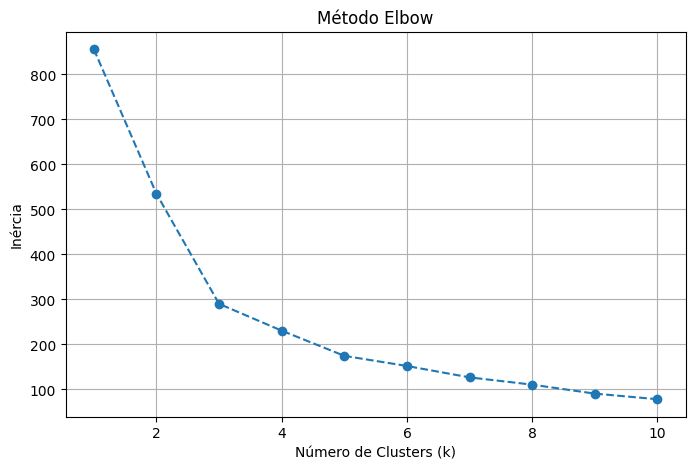

In [4]:
# Carregar os dados de volatilidade e volume
file_name = "tickers_volatility_return.csv"
return_volatility_data = pd.read_csv(file_name)

# Obter os valores de volatilidade e volume
volatilities = return_volatility_data['Volatility'].values.reshape(-1, 1)
returns = return_volatility_data['Return 13Y'].values.reshape(-1, 1)

# Concatenar volatilidade e volume em um único array
data = np.hstack((volatilities, returns))

# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determinar o número ideal de clusters (método elbow)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot do método elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Método Elbow")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()

In [ ]:
# Escolher o número de clusters com base no método elbow
n_clusters = 5  # Ajuste conforme o gráfico
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

# Adicionar os clusters ao DataFrame original
return_volatility_data['Cluster'] = kmeans.labels_

# Salvar os clusters em um novo arquivo
output_file = "tickers_clusters.csv"
return_volatility_data.to_csv(output_file)
print(f"Clusters salvos em: {output_file}")

for i in range (len(return_volatility_data)):
    print(return_volatility_data['Ticker'][i], return_volatility_data['Cluster'][i])

'# Salvar os clusters em um novo arquivo\noutput_file = "tickers_clusters.csv"\nreturn_volatility_data.to_csv(output_file)\nprint(f"Clusters salvos em: {output_file}")\n\nfor i in range (len(return_volatility_data)):\n    print(return_volatility_data[\'Ticker\'][i], return_volatility_data[\'Cluster\'][i])'

In [10]:

# Load NASDAQ tickers data
nasdaq_tickers_df = pd.DataFrame(nasdaq_tickers, columns=['Ticker'])

# Initialize an empty list to store the cluster data
nasdaq_cluster_data = []

# Iterate over each NASDAQ ticker
for ticker in nasdaq_tickers:
    try:
        # Download historical data
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Verify if 'Close' exists in the data
        if 'Close' not in data:
            print(f"Error processing ticker {ticker}: Insufficient data.")
            continue
        
        # Calculate daily returns
        data['Daily_Return'] = data['Close'].pct_change()
        
        # Calculate volatility as the standard deviation of daily returns
        volatility = data['Daily_Return'].std()

        return_13y = (data['Close'].values[-1] - data['Close'].values[0]) / data['Close'].values[0]
        
        # Add volatility and return data
        nasdaq_cluster_data.append({"Ticker": ticker, "Volatility": volatility, "Return 13Y": return_13y})
    
    except Exception as e:
        print(f"Error processing ticker {ticker}: {e}")

# Create DataFrame for NASDAQ tickers
nasdaq_volatility_df = pd.DataFrame(nasdaq_cluster_data)

# Get the values of volatility and returns
nasdaq_volatilities = nasdaq_volatility_df['Volatility'].values.reshape(-1, 1)
nasdaq_returns = nasdaq_volatility_df['Return 13Y'].values.reshape(-1, 1)

# Concatenate volatility and returns into a single array
nasdaq_data = np.hstack((nasdaq_volatilities, nasdaq_returns))

# Normalize the data
nasdaq_data_scaled = scaler.transform(nasdaq_data)

# Predict clusters using the already fitted KMeans model
nasdaq_clusters = kmeans.predict(nasdaq_data_scaled)

# Add the clusters to the DataFrame
nasdaq_volatility_df['Cluster'] = nasdaq_clusters

# Save the clusters to a new CSV file
nasdaq_output_file = "nasdaq_tickers_clusters.csv"
nasdaq_volatility_df.to_csv(nasdaq_output_file, index=False)
print(f"NASDAQ clusters saved in: {nasdaq_output_file}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

NASDAQ clusters saved in: nasdaq_tickers_clusters.csv


In [8]:
# Agrupar os dados por cluster
cluster_groups = return_volatility_data.groupby('Cluster')

# Calcular a média e o desvio padrão para cada cluster
cluster_summary = cluster_groups.agg({
    'Return 13Y': ['mean', 'std'],
    'Volatility': ['mean', 'std']
}).reset_index()

# Adicionar o número de membros em cada cluster
cluster_summary['Size'] = cluster_groups.size().values

# Renomear as colunas para melhor legibilidade
cluster_summary.columns = ['Cluster', 'Mean Return 13Y', 'Return 13Y Std', 'Mean Volatility', 'Volatility Std', 'Size']

print(cluster_summary)

   Cluster  Mean Return 13Y  Return 13Y Std  Mean Volatility  Volatility Std  \
0        0        17.954516        4.011233         0.019355        0.002906   
1        1         4.161282        5.266968         0.026988        0.002965   
2        2        51.845837       17.865172         0.025879        0.005078   
3        3         3.786231        3.005563         0.014899        0.001683   
4        4         3.283471        2.832777         0.019930        0.001653   

   Size  
0    39  
1    52  
2    15  
3   192  
4   130  


In [2]:
# Define a helper function to fetch and process FRED data
def fetch_fred_data(series_id, column_name):
    data = fred.get_series(series_id, observation_start='2010-01-01', observation_end='2023-12-31')
    df = data.reset_index()
    df.columns = ['Date', column_name]
    df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)  # Ensure Date is in datetime format and remove timezone
    return df

In [3]:
def wyckoff_phase(row):
    if row['Trend'] == 'Downtrend' and row['Volume_Spike']:
        return 'Accumulation'
    elif row['Trend'] == 'Uptrend' and row['Breakout'] == 'Breakout_Up':
        return 'Markup'
    elif row['Trend'] == 'Uptrend' and row['Breakout'] == 'Breakout_Down':
        return 'Distribution'
    elif row['Trend'] == 'Downtrend' and row['Breakout'] == 'Breakout_Down':
        return 'Markdown'
    else:
        return 'Neutral'

### Feature Extraction

In [11]:
data_cluster_1={}
data_cluster_2={}
data_cluster_3={}
data_cluster_4={}
data_cluster_5={}
dict_data=[data_cluster_1,data_cluster_2,data_cluster_3,data_cluster_4,data_cluster_5]

tickers_clustered=pd.read_csv('tickers_clusters.csv')
nasdaq_tickers=pd.read_csv('nasdaq_tickers_clusters.csv')

for i in range (len(nasdaq_tickers)):
    print(nasdaq_tickers['Ticker'][i], nasdaq_tickers['Cluster'][i])
    ticker=nasdaq_tickers['Ticker'][i]
    cluster=nasdaq_tickers['Cluster'][i]

    # Download historical data for SPY
    spy_data = yf.download(ticker, start='2010-01-01', end='2024-01-31')
    spy_data.columns = spy_data.columns.get_level_values(0) 
    # Reset index to make Date a column
    spy_data.reset_index(inplace=True)

    # Select relevant features
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Date']
    spy_data = spy_data[features]

    # Create new features
    spy_data['Day_of_Week'] = spy_data['Date'].dt.dayofweek  # Monday=0, Sunday=6
    spy_data['Month'] = spy_data['Date'].dt.month  # January=1, December=12

    spy_data['EMA12'] = spy_data['Close'].ewm(span=12, adjust=False).mean()
    spy_data['EMA26'] = spy_data['Close'].ewm(span=26, adjust=False).mean()
    spy_data['MACD'] = spy_data['EMA12'] - spy_data['EMA26']  # MACD line
    spy_data['Signal_Line'] = spy_data['MACD'].ewm(span=9, adjust=False).mean()  # Signal line
    spy_data['MACD_Histogram'] = spy_data['MACD'] - spy_data['Signal_Line']  # MACD Histogram

    # CCI (Commodity Channel Index)
    typical_price = (spy_data['High'] + spy_data['Low'] + spy_data['Close']) / 3
    mean_deviation = lambda x: np.mean(np.abs(x - x.mean()))
    spy_data['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).apply(mean_deviation))

    # ATR (Average True Range)
    high_low = spy_data['High'] - spy_data['Low']
    high_close = np.abs(spy_data['High'] - spy_data['Close'].shift())
    low_close = np.abs(spy_data['Low'] - spy_data['Close'].shift())
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    spy_data['ATR'] = true_range.rolling(window=14).mean()

    # Bollinger Bands (BOLL)
    spy_data['20_MA'] = spy_data['Close'].rolling(window=20).mean()
    spy_data['20_STD'] = spy_data['Close'].rolling(window=20).std()
    spy_data['Upper_Band'] = spy_data['20_MA'] + (2 * spy_data['20_STD'])
    spy_data['Lower_Band'] = spy_data['20_MA'] - (2 * spy_data['20_STD'])

    # EMA20 (20-day Exponential Moving Average)
    spy_data['EMA20'] = spy_data['Close'].ewm(span=20, adjust=False).mean()

    # MA5 and MA10 (5-day and 10-day Simple Moving Averages)
    spy_data['MA5'] = spy_data['Close'].rolling(window=5).mean()
    spy_data['MA10'] = spy_data['Close'].rolling(window=10).mean()

    # MTM6 and MTM12 (6-month and 12-month Momentum)
    spy_data['MTM6'] = spy_data['Close'].pct_change(periods=126)  # Approx. 6 months
    spy_data['MTM12'] = spy_data['Close'].pct_change(periods=252)  # Approx. 12 months

    # ROC (Rate of Change)
    spy_data['ROC'] = spy_data['Close'].pct_change(periods=10) * 100  # 10-day rate of change

    # SMI (Stochastic Momentum Index)
    low_min = spy_data['Low'].rolling(window=14).min()
    high_max = spy_data['High'].rolling(window=14).max()
    spy_data['SMI'] = 100 * ((spy_data['Close'] - low_min) / (high_max - low_min))

    # WVAD (Williams's Variable Accumulation/Distribution)
    spy_data['WVAD'] = ((spy_data['Close'] - spy_data['Low']) - (spy_data['High'] - spy_data['Close'])) / (spy_data['High'] - spy_data['Low']) * spy_data['Volume']

    # Williams %R
    spy_data['Daily_Return'] = spy_data['Close'].pct_change()

    for lag in range(1, 6):  # Add 5 lagged returns
        spy_data[f'Return_Lag_{lag}'] = spy_data['Daily_Return'].shift(lag)

    spy_data['Rolling_STD'] = spy_data['Close'].rolling(window=10).std()

        # Set up the FRED API with your key
    fred = Fred(api_key='79dac539cd182932f8edec9b4e75a7e7')

    # Remove time zone from interest_rate_df['Date']
    spy_data['Date'] = spy_data['Date'].dt.tz_localize(None)

    # Fetch macroeconomic data
    interest_rate_df = fetch_fred_data('FEDFUNDS', 'Interest_Rate')
    inflation_df = fetch_fred_data('CPIAUCSL', 'CPI')
    unemployment_df = fetch_fred_data('UNRATE', 'Unemployment_Rate')
    gdp_df = fetch_fred_data('GDPC1', 'Real_GDP')

    # Merge all macroeconomic data into spy_data
    macro_dfs = [interest_rate_df, inflation_df, unemployment_df, gdp_df]
    for macro_df in macro_dfs:
        spy_data = pd.merge(spy_data, macro_df, on='Date', how='left')

    # Forward-fill missing values for all macroeconomic columns
    macro_columns = ['Interest_Rate', 'CPI', 'Unemployment_Rate', 'Real_GDP']
    spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')

    # Fetch USD/EUR exchange rate
    exchange_data = yf.download('EURUSD=X', start='2010-01-01', end='2023-12-31')

    # Flatten columns if exchange_data has a multi-level index
    exchange_data.columns = exchange_data.columns.get_level_values(0)

    # Reset index to make 'Date' a column
    exchange_data.reset_index(inplace=True)
    # Keep only the 'Date' and 'Close' columns
    exchange_data = exchange_data[['Close']]
    exchange_data.rename(columns={'Close': 'Exchange_Rate'}, inplace=True)

    spy_data.drop('Date', inplace=True, axis=1)

    spy_data = spy_data.merge(exchange_data, left_index=True, right_index=True)

    spy_data['Short_MA'] = spy_data['Close'].rolling(window=20).mean()  # Short-term MA
    spy_data['Long_MA'] = spy_data['Close'].rolling(window=50).mean()  # Long-term MA

    # Trend Identification
    spy_data['Trend'] = 'Neutral'
    spy_data.loc[spy_data['Short_MA'] > spy_data['Long_MA'], 'Trend'] = 'Uptrend'
    spy_data.loc[spy_data['Short_MA'] < spy_data['Long_MA'], 'Trend'] = 'Downtrend'

    spy_data['Rolling_Max'] = spy_data['Close'].rolling(window=20).max()
    spy_data['Rolling_Min'] = spy_data['Close'].rolling(window=20).min()

    # Flatten the index
    spy_data.columns = spy_data.columns.get_level_values(0)  
    spy_data.reset_index(drop=True, inplace=True)

    spy_data['Breakout'] = 'None'
    spy_data.loc[spy_data['Close'] >= spy_data['Rolling_Max'], 'Breakout'] = 'Breakout_Up'
    spy_data.loc[spy_data['Close'] <= spy_data['Rolling_Min'], 'Breakout'] = 'Breakout_Down'

    spy_data['Average_Volume'] = spy_data['Volume'].rolling(window=20).mean()
    spy_data['Volume_Spike'] = spy_data['Volume'] > 1.2 * spy_data['Average_Volume']

    spy_data['Wyckoff_Phase'] = spy_data.apply(wyckoff_phase, axis=1)

    # Encode 'Trend'
    trend_encoder = LabelEncoder()
    spy_data['Trend_Encoded'] = trend_encoder.fit_transform(spy_data['Trend'])

    # Encode 'Breakout'
    breakout_encoder = LabelEncoder()
    spy_data['Breakout_Encoded'] = breakout_encoder.fit_transform(spy_data['Breakout'])

    # Encode 'Wyckoff_Phase'
    wyckoff_encoder = LabelEncoder()
    spy_data['Wyckoff_Phase_Encoded'] = wyckoff_encoder.fit_transform(spy_data['Wyckoff_Phase'])

    spy_data['Volume_Spike'] = spy_data['Volume_Spike'].astype('int')

    # Drop the original categorical columns
    spy_data.drop(columns=['Trend', 'Breakout', 'Wyckoff_Phase'], inplace=True)

    # Drop NaN values
    spy_data.dropna(inplace=True)

    # Convert to NumPy array
    data = spy_data.values
    dict_data[cluster][ticker]=data

[*********************100%***********************]  1 of 1 completed

ABNB 1



C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


APP 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ARM 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ASML 0


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AZN 3


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TEAM 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CDW 0


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CHTR 4


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CCEP 4


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CEG 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


CRWD 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DDOG 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


FANG 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DASH 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GEHC 4


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


GFS 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ILMN 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


KHC 4


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRVL 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MELI 2


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


META 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MRNA 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


MDB 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NXPI 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PANW 0


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PYPL 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


PDD 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA 2


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TTD 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


WDAY 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ZS 1


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_13420\1861231663.py:103: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data[macro_columns] = spy_data[macro_columns].fillna(method='ffill').fillna(method='bfill')
[*********************100%***********************]  1 of 1 completed


We have established a requirement to include only companies that have consistent and reliable data covering the period from 2010 to 2024. This criterion ensures that our analysis is comprehensive and reflects a robust timeline, enabling accurate insights and fair comparisons. Companies lacking data for this entire period will not be considered, as completeness is essential for the integrity of our assessment.

In [13]:
for i in range (len(dict_data)):
    pop_list=[]
    for j in dict_data[i].keys():
        if dict_data[i][j].shape != (3290,47): 
            pop_list.append(j)
    for j in pop_list:
        dict_data[i].pop(j)

In [14]:
for i in range(len(dict_data)):
    with open(f"nasdaq_data_{i}.pkl", "wb") as file:
        pickle.dump(dict_data[i], file)